# CS464 Introduction to Machine Learning Homework 2 Question 3 - Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define logistic function
def logit_mat(x,w):
    z = np.exp(-1*np.matmul(x,w))
    return 1/(1+z)

In [3]:
#testing algorithm for logistic regression
def predict(x,w):
    length = x.shape[0]
    prediction = np.zeros(length)
    temp = np.matmul(x, w)
    for i in range(length):
        if(temp[i] > 0):
            prediction[i] = 1
        else:
            prediction[i] = 0
    return prediction

In [4]:
#define gradient ascent function
def batch_ascent(x,w,y):
    return np.matmul(x.T,y-logit_mat(x,w))

In [5]:
#accuracy and confusion matrix calculation
def performanceCalc(pred, y):
    #accuracy
    sampleSize = y.shape[0]
    true_cnt = 0
    for i in range(sampleSize):
        if(pred[i] == y[i]):
            true_cnt += 1
    accuracy = true_cnt / sampleSize

    tr_pos = 0;
    tr_neg = 0;
    fls_pos = 0;
    fls_neg = 0;
    for i in range(sampleSize):
        if(pred[i] == 1 and y[i] ==1):
            tr_pos += 1
        elif(pred[i] == 0 and y[i] == 0):
            tr_neg += 1
        elif(pred[i] == 1 and y[i] == 0):
            fls_pos += 1
        elif(pred[i] == 0 and y[i] == 1):
            fls_neg += 1

    
    #performance metrics
    precision = tr_pos / (tr_pos+fls_pos)
    recall = tr_pos / (tr_pos+fls_neg)
    npv = tr_neg / (tr_neg+fls_neg)
    fpr = fls_pos / (fls_pos+tr_neg)
    fdr = fls_pos / (tr_pos+fls_pos)
    f1 = (2*precision*recall)/(precision+recall)
    f2 = (5*precision*recall)/(4*precision+recall)
    return accuracy, tr_pos, tr_neg, fls_pos,fls_neg , precision, recall, npv, fpr, fdr, f1, f2

In [6]:
#define macro and micro statistics based on idvidiual statistics calculated in performanceCalc()
def macroMicroAvr(pred, y):
    accuracy_pos, tr_pos_pos, tr_neg_pos, fls_pos_pos,fls_neg_pos , precision_pos, recall_pos, npv_pos, fpr_pos, fdr_pos, f1_pos, f2_pos = performanceCalc(pred,y)
    pred_neg = (pred==0).astype(float)
    y_neg = (y==0).astype(float)
    accuracy_neg, tr_pos_neg, tr_neg_neg, fls_pos_neg, fls_neg_neg, precision_neg, recall_neg, npv_neg, fpr_neg, fdr_neg, f1_neg, f2_neg = performanceCalc(pred_neg,y_neg)
    
    print("Accuracy: " + str(accuracy_pos))
    print("----------")
    print("Confusion Matrix for Positive Class")
    conf_matrix = pd.DataFrame([[tr_pos_pos, fls_pos_pos],[fls_neg_pos, tr_neg_pos]])
    conf_matrix.columns = ["actual+", "actual-"]
    conf_matrix.rename(index={0:'classifier+',1:'classifier-'}, inplace=True)
    print(conf_matrix)
    
    #macro 
    mac_precision = (precision_pos+precision_neg)/2
    mac_recall = (recall_pos+recall_neg)/2
    mac_npv = (npv_pos+npv_neg)/2
    mac_fpr = (fpr_pos+fpr_neg)/2
    mac_fdr = (fdr_pos+fdr_neg)/2
    mac_f1 = (f1_pos+f1_neg)/2
    mac_f2 = (f2_pos+f2_neg)/2
    #micro
    mic_precision = (tr_pos_pos+tr_pos_neg)/(tr_pos_pos+tr_pos_neg+fls_pos_pos+fls_pos_neg)
    mic_recall = (tr_pos_pos+tr_pos_neg)/(tr_pos_pos+tr_pos_neg+fls_neg_pos+fls_neg_neg)
    mic_npv = (tr_neg_pos+tr_neg_neg)/(tr_neg_pos+tr_neg_neg+fls_neg_pos+fls_neg_neg)
    mic_fpr = (fls_pos_pos+fls_pos_neg)/(fls_pos_pos+fls_pos_neg+tr_neg_pos+tr_neg_neg)
    mic_fdr = (fls_pos_pos+fls_pos_neg)/(fls_pos_pos+fls_pos_neg+tr_pos_pos+tr_pos_neg)
    mic_f1 = (2*precision_pos*recall_pos+2*precision_neg*recall_neg)/(precision_pos+recall_pos+precision_neg+recall_neg)
    mic_f2 = (5*precision_pos*recall_pos+5*precision_neg*recall_neg)/(4*precision_pos+recall_pos+4*precision_neg+recall_neg)
    
    print("---------")
    print("Macro Statistics")
    print("Macro Precision: " + str(mac_precision))
    print("Macro Recall: " + str(mac_recall))
    print("Macro NPV: " + str(mac_npv))
    print("Macro FPR: " + str(mac_fpr))
    print("Macro FDR: " + str(mac_fdr))
    print("Macro F1: " + str(mac_f1))
    print("Macro F2: " + str(mac_f2))
    print("---------")
    print("Micro Statistics")
    print("Micro Precision: " + str(mic_precision))
    print("Micro Recall: " + str(mic_recall))
    print("Micro NPV: " + str(mic_npv))
    print("Micro FPR: " + str(mic_fpr))
    print("Micro FDR: " + str(mic_fdr))
    print("Micro F1: " + str(mic_f1))
    print("Micro F2: " + str(mic_f2))
    print("----------")

In [7]:
#define the conditional log likelihood to decide on the best learning rate 
def loglikelihood(w,x,y):
    z = np.matmul(x,w)
    return np.sum(np.multiply(y,z) - np.log(1+np.exp(z)))

In [8]:
#deifne chunks to divide the feature into sets with mini-batch/stochastic ascent algorithm
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i+n]

In [9]:
#import data
x_train = pd.read_csv('question-2-train-features.csv', header=None, sep=',', names=["month","hr",
                                                                                    "weekday","weathersit",
                                                                                    "temp","atemp","hum",
                                                                                    "windspeed"])
y_train = pd.read_csv('question-2-train-labels.csv', header=None, sep=',', names=["bikes"])
x_test = pd.read_csv('question-2-test-features.csv', header=None, sep=',', names=["month","hr",
                                                                                    "weekday","weathersit",
                                                                                    "temp","atemp","hum",
                                                                                    "windspeed"])
y_test = pd.read_csv('question-2-test-labels.csv', header=None, names=["bikes"])

x_test.insert(loc=0, column='pseudo', value=np.ones(x_test.shape[0]))
x_train.insert(loc=0, column='pseudo', value=np.ones(x_train.shape[0]))

x_train_arr = np.asarray(x_train)
y_train_arr = np.asarray(y_train)
x_test_arr = np.asarray(x_test)
y_test_arr = np.asarray(y_test)
print(x_train.head(5))
print(y_train.head(5))
print(x_train.shape)
print(x_test.head(5))
print(y_test.head(5))
print(x_test.shape)

   pseudo  month   hr  weekday  weathersit  temp   atemp   hum  windspeed
0     1.0    1.0  1.0      6.0         1.0  0.22  0.2727  0.80     0.0000
1     1.0    1.0  2.0      6.0         1.0  0.22  0.2727  0.80     0.0000
2     1.0    1.0  3.0      6.0         1.0  0.24  0.2879  0.75     0.0000
3     1.0    1.0  4.0      6.0         1.0  0.24  0.2879  0.75     0.0000
4     1.0    1.0  5.0      6.0         2.0  0.24  0.2576  0.75     0.0896
   bikes
0   40.0
1   32.0
2   13.0
3    1.0
4    1.0
(14000, 9)
   pseudo  month    hr  weekday  weathersit  temp   atemp   hum  windspeed
0     1.0    8.0  14.0      6.0         1.0  0.80  0.7424  0.49     0.2985
1     1.0    8.0  15.0      6.0         1.0  0.80  0.7273  0.46     0.2836
2     1.0    8.0  16.0      6.0         1.0  0.80  0.7273  0.46     0.2985
3     1.0    8.0  17.0      6.0         3.0  0.74  0.6970  0.66     0.3582
4     1.0    8.0  18.0      6.0         2.0  0.70  0.6667  0.74     0.2985
   bikes
0  538.0
1  562.0
2  531.0
3  51

In [10]:
#discretizing the labels
#find mean of labels
all_label = pd.concat([y_test, y_train], axis=0, sort = True)
label_mean = np.mean(all_label.values)
print(label_mean)
#discretizing
for i in range(y_test.shape[0]):
    if(y_test_arr[i] >= label_mean):
        y_test_arr[i] = 1
    else:
        y_test_arr[i] = 0
y_test = pd.DataFrame(y_test_arr)
print(y_test.shape)
for i in range(y_train.shape[0]):
    if(y_train_arr[i] >= label_mean):
        y_train_arr[i] = 1
    else:
        y_train_arr[i] = 0
y_train = pd.DataFrame(y_train_arr)
print(y_train.shape)

189.47306939808954
(3378, 1)
(14000, 1)


# Question 3.1
## Try different learning rates to choose the best one.

In [11]:
#initialize the weight vector
weight_temp = np.zeros((x_train_arr.shape[1],1))
#apply gradient ascent to find the logistic regression parameters
iterationNo = 1000
learn_rates = np.array([10**-5, 10**-4, 10**-3, 10**-2, 10**-1])
#init weight matrix
weights = np.zeros((x_train_arr.shape[1],learn_rates.shape[0]))
cnt = 0
for rate in learn_rates:
    for i in range(iterationNo):
        weight_temp += rate * batch_ascent(x_train_arr,weight_temp,y_train_arr)
    weights[:,cnt] = weight_temp.reshape(x_train_arr.shape[1])
    cnt+=1
    #reinitialize the weight vector
    weight_temp = np.zeros((x_train_arr.shape[1],1))
print(weights)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


[[-1.73718967e+00 -1.49890839e+01 -1.53924868e+02 -1.53788154e+03
  -1.53676111e+04]
 [ 3.12430625e-01  2.66837224e+00 -5.17774722e+00 -5.21827278e+01
  -5.28351010e+02]
 [ 7.34121103e-01  7.94121242e+00  3.39482124e+00  3.31674432e+01
   3.06130383e+02]
 [ 1.04921709e-01 -5.63511556e-02 -1.58990065e+01 -1.58497904e+02
  -1.58549107e+03]
 [-3.68980480e+00 -3.36299390e+01 -3.40305269e+02 -3.39871616e+03
  -3.38610586e+04]
 [ 3.04904078e+00  3.13856405e+01  3.11217006e+02  3.11110741e+03
   3.10752916e+04]
 [ 2.67864391e+00  2.76136357e+01  2.73618374e+02  2.73519450e+03
   2.73204637e+04]
 [-2.97170937e+00 -2.88393977e+01 -2.90212812e+02 -2.90060720e+03
  -2.89804270e+04]
 [-1.21858415e-01 -7.03038527e-01 -7.76728478e+00 -7.72092145e+01
  -7.68762940e+02]]


In [12]:
#choosing will be based on the max log likelihood
likes = np.zeros((weights.shape[1],1))
for i in range(weights.shape[1]):
    likes[i] = loglikelihood(weights[:,i].reshape((weights.shape[0],1)),x_train_arr,y_train_arr)
print(likes)

[[-3.55589053e+04]
 [-3.97990673e+05]
 [-2.29847390e+06]
 [-2.30134179e+07]
 [-2.31486303e+08]]


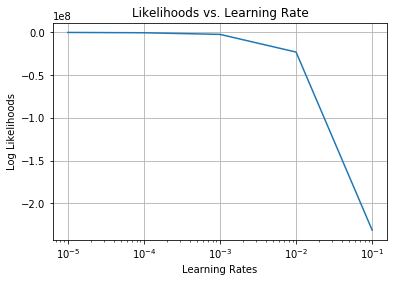

In [13]:
#plot the log-likelihoods vs learning rate
plt.semilogx(learn_rates,likes)
plt.xlabel("Learning Rates")
plt.ylabel("Log Likelihoods")
plt.title("Likelihoods vs. Learning Rate")
plt.grid()
plt.show()

In [14]:
opt_weight = weights[:,np.argmax(likes)]
print(opt_weight)
opt_rate = learn_rates[np.argmax(likes)]
print(opt_rate)

[-1.73718967  0.31243063  0.7341211   0.10492171 -3.6898048   3.04904078
  2.67864391 -2.97170937 -0.12185841]
1e-05


## Test and Report Results

In [15]:
prediction = predict(x_test_arr,opt_weight.reshape((opt_weight.shape[0],1)))
macroMicroAvr(prediction, y_test_arr)

Accuracy: 0.7048549437537004
----------
Confusion Matrix for Positive Class
             actual+  actual-
classifier+     1721      953
classifier-       44      660
---------
Macro Statistics
Macro Precision: 0.7905525430067315
Macro Recall: 0.6921231355013884
Macro NPV: 0.7905525430067315
Macro FPR: 0.3078768644986117
Macro FDR: 0.2094474569932685
Macro F1: 0.6725510329782816
Macro F2: 0.6725831373908745
---------
Micro Statistics
Micro Precision: 0.7048549437537004
Micro Recall: 0.7048549437537004
Micro NPV: 0.7048549437537004
Micro FPR: 0.2951450562462996
Micro FDR: 0.2951450562462996
Micro F1: 0.6819849671091096
Micro F2: 0.655860847494576
----------


# Question 3.2
## Mini-Batch Gradient Ascent

In [16]:
batch_size = 32
iterationNo = 1000
batch_no = np.ceil(x_train_arr.shape[0] / batch_size)

min_btc_weights = np.zeros((x_train.shape[1],1))

np.random.seed(0)
for i in range(iterationNo):
    idx = np.random.permutation(len(x_train_arr))
    x_tr_arr_shuf,y_tr_arr_shuf = x_train_arr[idx], y_train_arr[idx]
    x_cnks = list(chunks(x_tr_arr_shuf, batch_size))
    y_cnks = list(chunks(y_tr_arr_shuf, batch_size))
    for b_ind in range(int(batch_no)):
        batch_x = x_cnks[b_ind]
        batch_y = y_cnks[b_ind]
        min_btc_weights += (opt_rate/batch_size) * (batch_ascent(batch_x,min_btc_weights,batch_y))*batch_x.shape[0]
print(min_btc_weights)
    

[[-1.62888768]
 [ 0.02062638]
 [ 0.08231046]
 [ 0.01339434]
 [-0.32571506]
 [ 1.66922083]
 [ 1.46332872]
 [-1.88684514]
 [-0.06407071]]


In [17]:
min_btc_prediction = predict(x_test_arr,min_btc_weights)
macroMicroAvr(min_btc_prediction, y_test_arr)

Accuracy: 0.6862048549437537
----------
Confusion Matrix for Positive Class
             actual+  actual-
classifier+      853      148
classifier-      912     1465
---------
Macro Statistics
Macro Precision: 0.7342354742438882
Macro Recall: 0.6957658121249269
Macro NPV: 0.7342354742438882
Macro FPR: 0.3042341878750731
Macro FDR: 0.26576452575611176
Macro F1: 0.6755554830677561
Macro F2: 0.6793714828948466
---------
Micro Statistics
Micro Precision: 0.6862048549437537
Micro Recall: 0.6862048549437537
Micro NPV: 0.6862048549437537
Micro FPR: 0.3137951450562463
Micro FDR: 0.3137951450562463
Micro F1: 0.6794426827220804
Micro F2: 0.6686499356061869
----------


## Stochastic Gradient Ascent

In [18]:
#initialize the weight vector
stoc_weights = np.zeros((x_train.shape[1],1))
#apply gradient ascent to find the logistic regression parameters
iterationNo = 1000
np.random.seed(0)
cnt=0
for i in range(iterationNo):
    idx = np.random.permutation(len(x_train_arr))
    x_tr_arr_shuf,y_tr_arr_shuf = x_train_arr[idx], y_train_arr[idx]
    for b_ind in range(x_tr_arr_shuf.shape[0]):
        rand_feature = x_tr_arr_shuf[b_ind,:].reshape((x_tr_arr_shuf.shape[1],1)).T
        rand_label = y_tr_arr_shuf[b_ind,:].reshape((y_tr_arr_shuf.shape[1],1))
        stoc_weights += opt_rate * batch_ascent(rand_feature,stoc_weights,rand_label)
print(stoc_weights)

[[-1.62935501]
 [ 0.02059789]
 [ 0.08230649]
 [ 0.01342694]
 [-0.32558727]
 [ 1.66970225]
 [ 1.46376512]
 [-1.88734992]
 [-0.06405414]]


In [19]:
sto_prediction = predict(x_test_arr,stoc_weights)
macroMicroAvr(sto_prediction, y_test_arr)

Accuracy: 0.6859088217880402
----------
Confusion Matrix for Positive Class
             actual+  actual-
classifier+      852      148
classifier-      913     1465
---------
Macro Statistics
Macro Precision: 0.7340319596299412
Macro Recall: 0.6954825260059467
Macro NPV: 0.7340319596299412
Macro FPR: 0.30451747399405327
Macro FDR: 0.2659680403700589
Macro F1: 0.6752133530099143
Macro F2: 0.6790471520223464
---------
Micro Statistics
Micro Precision: 0.6859088217880402
Micro Recall: 0.6859088217880402
Micro NPV: 0.6859088217880402
Micro FPR: 0.31409117821195975
Micro FDR: 0.31409117821195975
Micro F1: 0.6791217222392335
Micro F2: 0.6683084375832844
----------
